In [1]:
'''
Salary Prediction using Multiple Linear Regeression.

Group Members:- 
216270307070 - Vishakha U. Chudasama
216270307085 - Malay Bavrava
'''
# importing modules
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# for data selection
from sklearn.model_selection import train_test_split
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**<h1>Data Cleaning</h1>**

In [2]:
data = pd.DataFrame(pd.read_csv("/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv"))
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
print("Null Values in Dataset :- \n",data.isnull().sum(),"\n")
print(data.size,"\n",data.shape)

Null Values in Dataset :- 
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64 

2250 
 (375, 6)


In [4]:
data_new = data.dropna()
data_new.isnull().sum()
data_new.shape

(373, 6)

In [5]:
# a summary of the dataset
data_new.info()

# basic stats
data_new.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


 **<h1>Data Visualization</h1>**

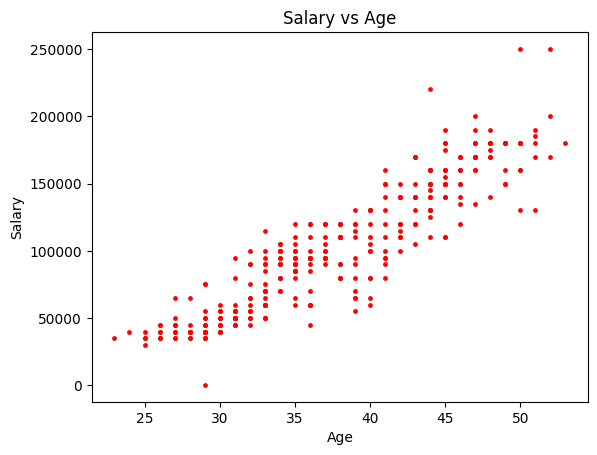

In [6]:
# Create a line plot
plt.scatter(data_new['Age'], data_new['Salary'], color='red', s=6)

# Customize the plot
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')

# Show the plot
plt.show()

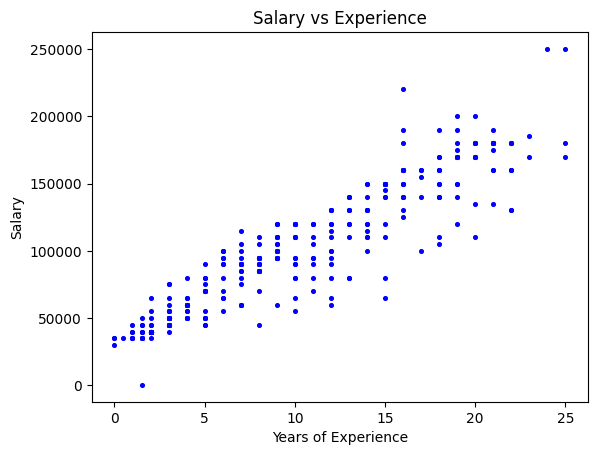

In [7]:
# Create a line plot
plt.scatter(data_new['Years of Experience'], data_new['Salary'], color='blue', s=7)

# Customize the plot
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show the plot
plt.show()

 **<h1>Data Selection</h1>**

In [8]:
data_new

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [9]:
x2 =  np.array(data_new[["Age","Years of Experience"]])
y2 = np.array(data_new["Salary"])

In [10]:
# spliting the dataset
x_train , x_test , y_train , y_test = train_test_split(x2,y2,test_size=0.3)

 **<h1>Multiple Linear Regression</h1>**

In [11]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
y_predict = reg.predict(x_test)

In [13]:
# Calculate the R-squared (coefficient of determination)
r2 = r2_score(y_test, y_predict)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_predict)

# Print the results
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared (R2): 0.89
Mean Squared Error (MSE): 250228982.20


In [14]:
# Calculate the model accuracy as a percentage
accuracy_percentage = r2 * 100

# Print the results
print(f"The model accuracy using the R2 score: {accuracy_percentage:.2f}%")

The model accuracy using the R2 score: 89.40%


 **<h1>Plotting the Model</h1>**

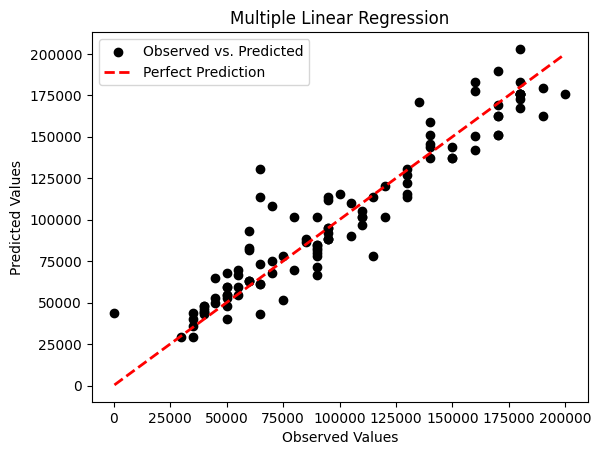

In [15]:

# Create a scatter plot
plt.scatter(y_test, y_predict, color='black', label='Observed vs. Predicted')

# Add labels and title
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')

# Add a regression line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Show the legend
plt.legend()

# Display the plot
plt.show()